<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#CLASSIFY IMAGES
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using TensorFlow backend.


In [65]:
#load data
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

In [66]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [67]:
#LOOK AT THE TYPES
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [68]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [69]:
#TAKE A LOOK AT THE FIRST IMAGE
index=0
X_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

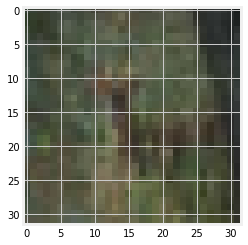

In [70]:

plt.imshow(X_train[index+10])

In [71]:
X_train[index].shape

(32, 32, 3)

In [72]:
Y_train[index]

array([6], dtype=uint8)

In [73]:
#IMAGE CLASSIFICATION
classification=['airplane','automobile' ,'bird','cat','dog','frog','horse','ship','truck']

In [74]:
classification[Y_train[index][0]]

'horse'

In [75]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [76]:
#Convert the label into a set of 10 numbers
Y_train_one_hot=to_categorical(Y_train)

In [77]:
Y_test_one_hot=to_categorical(Y_test)

In [78]:
Y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:

Y_train_one_hot[index]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [80]:
X_train=X_train/255
X_test=X_test/255

In [81]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [82]:
X_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [83]:
X_train[index].shape

(32, 32, 3)

In [110]:
#BUILDING THE NN
model=Sequential()
#FIRST LAYER
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#POOL LAYER
model.add(MaxPooling2D(pool_size=(2,2)))
#2ND LAYER
model.add(Conv2D(32,(5,5),activation='relu'))
#FLATTENING LAYER
model.add(Flatten())
#ADD A LAYER WITH 1000 NEURONS
model.add(Dense(2000,activation='relu'))
#ADD A DROPOUT LAYER
model.add(Dropout(0.5))
#ADD A LAYER WITH 500 NEURONS
model.add(Dense(1000,activation='relu'))
#ADD A DROPOUT LAYER
model.add(Dropout(0.5))
#ADD A LAYER WITH 250 NEURONS
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
#ADD A LAYER WITH 10 NEURONS
model.add(Dense(10,activation='softmax'))

In [111]:
#COMPILE THE MODEL
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#TRAIN THE MODEL
hist=model.fit(X_train,Y_train_one_hot,batch_size=128,epochs=20,validation_split=.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 124s 3ms/step - loss: 1.8663 - accuracy: 0.3013 - val_loss: 1.6396 - val_accuracy: 0.4123
Epoch 2/20
40000/40000 [==============================] - 123s 3ms/step - loss: 1.5282 - accuracy: 0.4371 - val_loss: 1.4417 - val_accuracy: 0.4849
Epoch 3/20
40000/40000 [==============================] - 123s 3ms/step - loss: 1.3909 - accuracy: 0.4966 - val_loss: 1.3229 - val_accuracy: 0.5341
Epoch 4/20
40000/40000 [==============================] - 126s 3ms/step - loss: 1.2748 - accuracy: 0.5421 - val_loss: 1.2462 - val_accuracy: 0.5620
Epoch 5/20
40000/40000 [==============================] - 123s 3ms/step - loss: 1.1769 - accuracy: 0.5835 - val_loss: 1.1857 - val_accuracy: 0.5782
Epoch 6/20
40000/40000 [==============================] - 125s 3ms/step - loss: 1.0634 - accuracy: 0.6213 - val_loss: 1.1230 - val_accuracy: 0.6066
Epoch 7/20
40000/40000 [==============================] - 125s

In [87]:
hist

In [88]:
#EVALUATE THE MODEL ON TEST DATA
model.evaluate(X_test,Y_test_one_hot)[1]

10000/10000 [==============================] - 6s 624us/step


0.6434000134468079

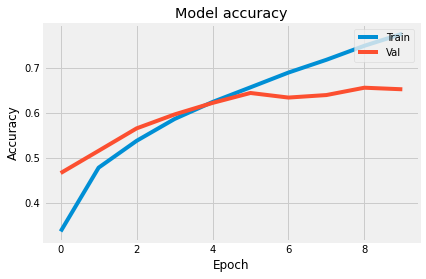

In [89]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc="upper right")

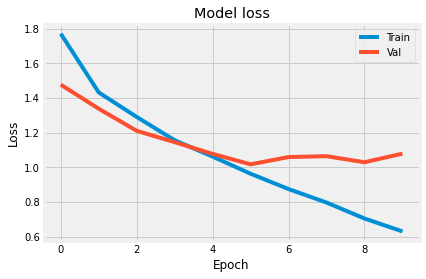

In [90]:
#MODEL LOSS
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc="upper right")

In [100]:
from google.colab import files
uploaded=files.upload()

Saving caat.jpg to caat.jpg


In [102]:
newimg=plt.imread('caat.jpg')

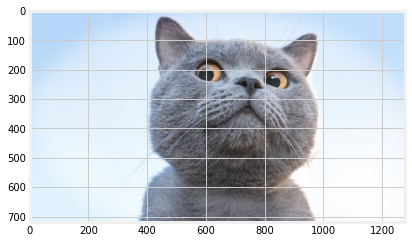

In [103]:
img=plt.imshow(newimg)

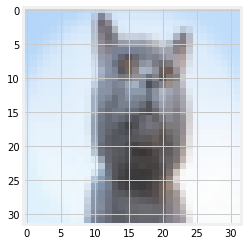

In [104]:

#RESIZE
from skimage.transform import resize
resized_image=resize(newimg,(32,32,3))
imgg=plt.imshow(resized_image)

In [105]:
#PREDICTION
predictions=model.predict(np.array([resized_image]))

In [106]:
predictions

array([[1.27026625e-02, 9.26346838e-05, 5.70496857e-01, 2.21314639e-01,
        4.79145944e-02, 1.04986764e-01, 2.52396101e-03, 3.25287543e-02,
        7.34122051e-03, 9.80466575e-05]], dtype=float32)

In [107]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

In [108]:
list_index

[2, 3, 5, 4, 7, 0, 8, 6, 9, 1]

In [109]:
for i in range(5):
  print(classification[list_index[i]],":",predictions[0][list_index[i]]*100,"%")

bird : 57.04968571662903 %
cat : 22.131463885307312 %
frog : 10.49867644906044 %
dog : 4.791459441184998 %
ship : 3.252875432372093 %
